# Explore here
In this dataset, you will find the following variables:

package_name. Name of the mobile application (categorical)
review. Comment about the mobile application (categorical)
polarity. Class variable (0 or 1), being 0 a negative comment and 1, positive (categorical numeric)


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from pickle import dump

In [68]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')
raw_data

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
1,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
2,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
3,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
4,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
887,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
888,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
889,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1


In [69]:
raw_data = raw_data.drop(columns='package_name')
raw_data

,review,polarity
0,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
1,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
2,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
3,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
4,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
...,...,...
886,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
887,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
888,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
889,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1


In [70]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    891 non-null    object
 1   polarity  891 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


Per the above cell, there are 891 samples, all of which contain a value.

In [71]:
raw_data['review'].unique

<bound method Series.unique of 0                                                                                       privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.
1                messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.
2                    

Per the above cell, each sample in the dataset is unique, meaning there are not multiples of the same review.

In [72]:
raw_data.describe()

,polarity
count,891.000000
mean,0.344557
std,0.475490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: xlabel='polarity', ylabel='count'>

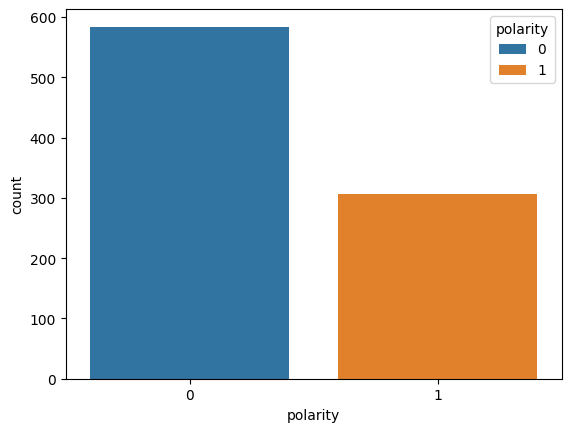

In [73]:
sns.countplot(raw_data, x='polarity', hue='polarity')

In [74]:
raw_data['review_length'] = raw_data['review'].str.len()
raw_data

,review,polarity,review_length
0,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0,386
1,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0,457
2,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0,378
3,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0,193
4,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0,466
...,...,...,...
886,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1,149
887,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1,302
888,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0,417
889,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1,91


In [75]:
polarity = [1, 0]

for i in polarity:
    avg_length = raw_data[raw_data['polarity'] == i]['review_length'].mean()
    print(f"The average length of reviews classsified as {i} is: {avg_length}")

The average length of reviews classsified as 1 is: 201.72964169381106
The average length of reviews classsified as 0 is: 247.71917808219177


Per the above cell the average length of negative reviews is 46 points higher than the average length of a positive review.

<Axes: xlabel='review_length'>

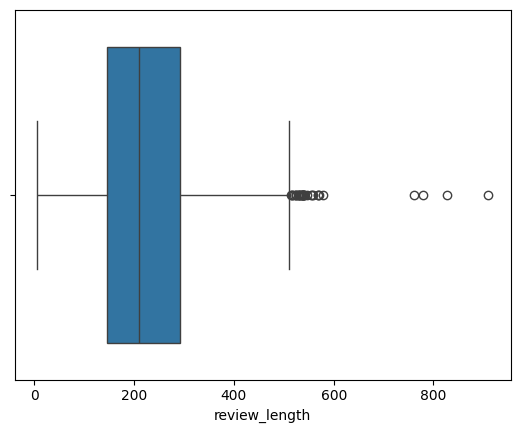

In [76]:
sns.boxplot(raw_data, x='review_length')

<Axes: xlabel='review_length'>

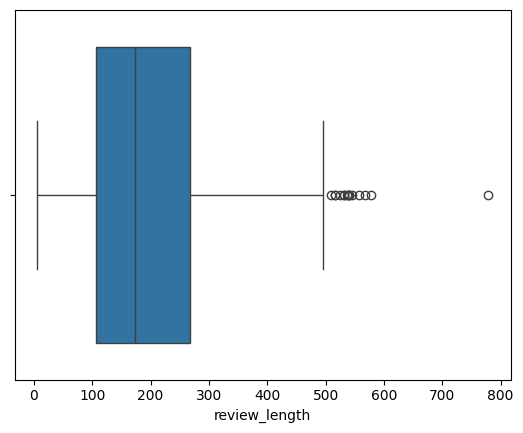

In [77]:
sns.boxplot(raw_data[raw_data['polarity']==1], x='review_length')

<Axes: xlabel='review_length'>

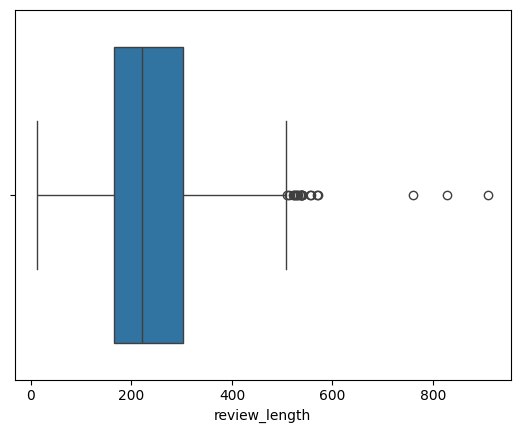

In [78]:
sns.boxplot(raw_data[raw_data['polarity']==0], x='review_length')

In [79]:
stats = raw_data['review_length'].describe()
iqr = stats['75%'] - stats['25%']
upper_limit = stats['75%'] + 1.5 * iqr
print(f"Upper limit: {upper_limit}")
up_out = raw_data[raw_data['review_length'] > upper_limit]
pd.set_option('display.max_colwidth', None)
up_out

Upper limit: 513.75


,review,polarity,review_length
78,"could be so much better if they'd stop making unneeded changes. while i love twitter, i hate that there is no paid service to remove ads. also there should be a quicker way to access your lists (like a shortcut on the home screen to a specific list would be awesome) and also i've heard that twitter is testing a non-chronological timeline. that is the worst idea ever. if that is implemented without a way to turn it off, i won't use twitter anymore. honestly, if third party apps had push notifications, i wouldn't use the official app at all. oh, and moments is dumb.",0,571
80,"bugs with contact syncing very frustrated. after having this app work fine for a couple years, i get an update that screwed up my contacts. i've read others' comments and the supposed solutions, including uninstalling and reinstalling the app. for a brief few hours last night, it appeared to re-sync my linkedin contacts back to my phone contacts. today, gone again. in any case, even when the contacts came back, all my previously set up shortcuts to those contacts were disabled. can you fix this linkedin? i use a samsung galaxy 3s.",0,537
89,"don't like the new look looks like a cheap dating site now. professional vibe is gone, poor facebook knockoff is here to stay. it's not just the aesthetics but the design as well. simple things, like viewing my connections or viewers, require more time, more taps, and more effort than before. others' connections are listed seemingly randomly, making it arduous to find anyone. it's worse on iphone, where speed is at a snail's pace. linkedin has lost its identity, and if it continues in this direction, it will lose its userbase too.",0,537
303,"err... how do i back up and restore chat history? i used to be able to do that in older versions. why would you remove such a crucial feature? even after trying to backup using windows wechat, you have no idea where the backup is. it says backup on phone, but where on phone?? if it's on the phone's internal storage then that's useless to me, cause i need to wipe it clean to reinstall the system. if it's on the sdcard, then where?? comparing to the backup/restore feature of whatsapp, wechat's is an absolute joke!!",0,521
320,"the ads ruin my fav app i mean the ads for viber desktop. i dial my friend, start talking and what happens next is: my microphone turns off, speakers turn on and the browser starts launching. so my friend is saying something for everyone to hear because she cant hear me and i am pushing buttons like crazy trying to stop browser from launching. it does take a while on my phone. what happens every time is that viber desktop ad launches about 3s after i make a call. thats the right way to stop me using the smartphone app.",0,525
325,"on sgh-i727 android 4.1.2 the new platform showing all contacts reduced your rating not just like the online status that doesn't give us option to identify our contacts that are online without having to tap on contacts one by one to see there individual online status and without necessarily having your disable/enable our personal settings. useless option that doesn't work ...frustrated users ratings going lower and lower..loosing your edge specialy with no response from you, other than the automated generic in privaye email",0,531
382,"the fail boat has arrived the 6.0 version is touted as being advanced, but in fact it contains a big old disappointment. the widget (which wasn't even available when google urged us to switch our sms function to hangouts), is now no longer available. wth? fail. why do i want to use an sms app, or any messaging app, which can't even give me a quick review widget on my home screen? pffft! rolled back to 4.2 apk. and using the standalone google messenger app which offers not one but two excellent widgets (one, person-specific).",0,535
443,few ui updates 1. group should be included with group status... so that if common event is there then the event can be posted through 

## Preprocess the data

In [80]:
raw_data['review'].dtype

dtype('O')

In [81]:
# remove spaces and convert the text to lowercase
raw_data['review'] = raw_data['review'].str.strip().str.lower()
raw_data

,review,polarity,review_length
0,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0,386
1,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0,457
2,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0,378
3,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0,193
4,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0,466
...,...,...,...
886,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1,149
887,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1,302
888,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0,417
889,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1,91


## Split into training and testing sets

In [82]:
X = raw_data.drop(columns='polarity')
y = raw_data['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train

,review,review_length
331,just did the latest update on viber and yet again after an update it has problems....i can send messages but when i try to make a call it's saying ringing but there's no sound and i don't think it's actually ringing at all and nobody answers my calls ...almost every time viber do updates some part of it after doesn't work ...please fix it asap...i'm in england ..thank you,376
733,keeps crashing it only works well in extreme data savings mode. in high data savings mode it keeps crashing and sometimes websites dont load.please fix this or i am moving to another browser.,192
382,"the fail boat has arrived the 6.0 version is touted as being advanced, but in fact it contains a big old disappointment. the widget (which wasn't even available when google urged us to switch our sms function to hangouts), is now no longer available. wth? fail. why do i want to use an sms app, or any messaging app, which can't even give me a quick review widget on my home screen? pffft! rolled back to 4.2 apk. and using the standalone google messenger app which offers not one but two excellent widgets (one, person-specific).",535
704,"superfast, just as i remember it ! opera mini was the #1 browser back in the days of symbian. glad to see it'still up there. superfast, smooth, minimal data used. as opposed to chrome which is starting to stutter , lag, even on simple pages with a few commercials.",265
813,installed and immediately deleted this crap i have used firefox on my desktop for longer then i can remember and i will continue to only use it on my desktop. your only options for a homepage are the crap they want you to see or a blank page with nothing on it and you can't go to a bookmarked website unless you want to go back to their crappy homepage just to see your bookmark list. and did i mention it's crap?,416
...,...,...
106,"why can't i share my achievements? recently discovered that there is a feature for sharing any kind of achievement, however i can't accomplish it on my profile",160
270,beta is the best version of the chrome browsers can't open bookmarks in a new tab or incognito window. can't switch tabs from bookmarks tab. horrible features. the following are issues across all barstools of the chrome browsers: no desktop preferred option. webpages refresh themselves by default and you lose what you are typing of you switch to another app. tabs mixed into os is annoying. no user agent switcher,416
860,"great little game. this is a great little game. i am completely addicted to this game. it's simple enough to learn, but has enough variety to keep you interested. this is an ad supported game, just so you know. i would be happy to buy the game together rid of the ads, however i haven't found where to do that yet.",320
435,"keeps crashing ever since i started using it more, it will crash every ten minutes. its starting to get more annoying, however it is convenient for saving text messages since i don't have unlimited messaging",208


In [84]:
y_train

331    0
733    0
382    0
704    1
813    1
      ..
106    0
270    0
860    1
435    0
102    0
Name: polarity, Length: 712, dtype: int64

In [85]:
X_test

,review,review_length
709,love/hate has bug and security issues. i tried to report that facebook and google plus have security issues and it wouldn't allow me to do so! well i just did didn't i! ......,176
439,whatsapp i use this app now that blackberry messenger has basically gone away. my friends & family live all over the world. this really helps keep us in touch!,160
840,usefully verry nice app,25
720,fonts why in the heck is this thing analysing my fonts??? not really quick browsing when i have to wait 5minutes for the fonts to load. are you asking my opinion? avoid this. terrible,184
39,app doesn't work after latest upgrade the facebook app refuses to work on my mobile data (3g) after the latest upgrade! it says it cannot connect right now.,157
...,...,...
433,"app continuously losses connection, at times i have to close app and reopen for it to reconnect. every message also takes around 10 seconds to send",149
773,"way below expection. why does it lag so much? scroll garda ni freeze hunxa. get it right, kntipur. i expected so much.",119
25,"can't install (error code: -505) have samsung galaxy note edge, had issues and couldn't update so i uninstalled the app and now i can't reinstall it. total bs!",160
84,"sort it out why can i not get my networks posts in recent order on my mobile app? on my pc it happens, why am i looking at post from 1day ago before posts say happening 1 hour ago? this is so annoying, how do you sort it out? also your help centre on mobile is not working hence i have had to resort to this. what is going on?",329


In [86]:
y_test

709    0
439    1
840    1
720    0
39     0
      ..
433    0
773    0
25     0
84     0
10     0
Name: polarity, Length: 179, dtype: int64

## Further preprocessing

In [87]:
vec_model = CountVectorizer(stop_words = "english")

X_train_vec = vec_model.fit_transform(X_train['review'])
X_test_vec = vec_model.transform(X_test['review'])

# Convert to DataFrame
X_train_vec_df = pd.DataFrame(X_train_vec.toarray(), columns=vec_model.get_feature_names_out())
X_test_vec_df = pd.DataFrame(X_test_vec.toarray(), columns=vec_model.get_feature_names_out())

# Reset index to align with the original DataFrame
X_train_vec_df.index = X_train.index
X_test_vec_df.index = X_test.index

# Concatenate with original DataFrame (excluding the original 'review' column)
X_train = pd.concat([X_train.drop(columns=['review']), X_train_vec_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['review']), X_test_vec_df], axis=1)

In [88]:
X_train

,review_length,000,04,0x,10,100,101,11,113mb,1186,...,šŕ,šŕľ,ťŕ,ťŕľ,źŕ,żŕ,żŕľ,žŕ,žŕľ,ˇŕ
331,376,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733,192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,535,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,265,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,320,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,208,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X_test

,review_length,000,04,0x,10,100,101,11,113mb,1186,...,šŕ,šŕľ,ťŕ,ťŕľ,źŕ,żŕ,żŕľ,žŕ,žŕľ,ˇŕ
709,176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720,184,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,149,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
773,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,329,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## GaussianNB

In [90]:
GNB_model = GaussianNB()
scores = cross_val_score(GNB_model, X_train, y_train, cv=5)
scores

array([0.77622378, 0.79020979, 0.8028169 , 0.73239437, 0.77464789])

## MultinomialNB

In [91]:
MNB_model = MultinomialNB()
scores = cross_val_score(MNB_model, X_train, y_train, cv=5)
scores

array([0.7972028 , 0.78321678, 0.77464789, 0.74647887, 0.78873239])

## BernoulliNB

In [92]:
BNB_model = BernoulliNB()
scores = cross_val_score(BNB_model, X_train, y_train, cv=5)
scores

array([0.74825175, 0.72027972, 0.78169014, 0.70422535, 0.76760563])

## Tune the best model
The Multinational Naive Bayes has the best average score so I will tune that model.

In [93]:
class_one = len(y_train[y_train  == 1]) / len(y_train)
class_two = 1 - class_one
weights = [class_two, class_one]

hyperparams = {
    'alpha': [1.0, 0.8, 0.5, 0.3, 0],
    'force_alpha': [True, False],
    'fit_prior': [True, False],
    'class_prior': [None, weights]
}

In [94]:
halving_search = HalvingGridSearchCV(MNB_model, hyperparams, scoring='balanced_accuracy', cv=5)
halving_search

HalvingGridSearchCV(estimator=MultinomialNB(),
                    param_grid={'alpha': [1.0, 0.8, 0.5, 0.3, 0],
                                'class_prior': [None,
                                                [0.6432584269662922,
                                                 0.35674157303370785]],
                                'fit_prior': [True, False],
                                'force_alpha': [True, False]},
                    scoring='balanced_accuracy')

In [95]:
run_halv_grid = True

if run_halv_grid:
    import warnings
    warnings.filterwarnings("ignore")

    halving_search.fit(X_train, y_train)
    print(f"Best hyperparameters: {halving_search.best_params_}")

Best hyperparameters: {'alpha': 0.3, 'class_prior': [0.6432584269662922, 0.35674157303370785], 'fit_prior': True, 'force_alpha': True}


In [98]:
tuned_MNB_model = MultinomialNB(alpha=0.3, force_alpha=True, fit_prior=True, class_prior=weights)
scores = cross_val_score(MNB_model, X_train, y_train, cv=5)
scores

array([0.7972028 , 0.78321678, 0.77464789, 0.74647887, 0.78873239])

## Make predictions using the test data

In [99]:
tuned_MNB_model.fit(X_train, y_train)
y_pred = tuned_MNB_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [100]:
accuracy_score(y_test, y_pred)

0.8324022346368715

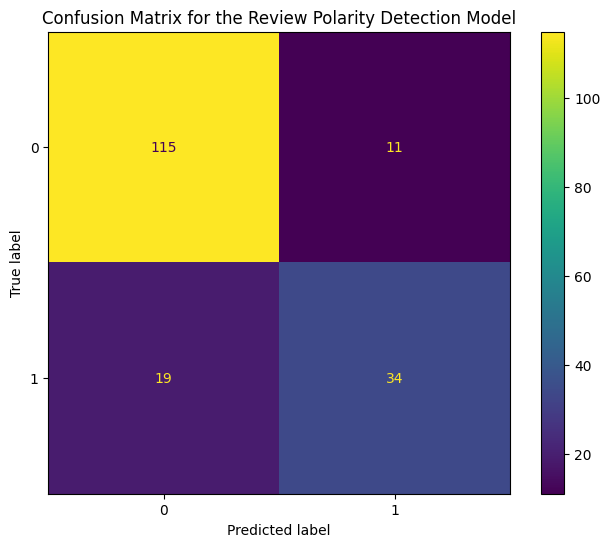

In [101]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=tuned_MNB_model.classes_)
ax.set(title='Confusion Matrix for the Review Polarity Detection Model')
display.plot(ax=ax);

In [102]:
dump(tuned_MNB_model, open("../models/MNB_alpha-0.3_force_alpha-True_fit_prior-True_class_prior-[0.6432584269662922, 0.35674157303370785].sav", "wb"))